In [108]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_palette('colorblind')

In [109]:
logdir = '../logs/analyse_test/'

In [110]:
df = pd.read_csv(logdir + 'coop_stats_00.txt', delimiter='\t')
df

,fkeCoop,fkeRob,Rep,Iter,nbRob,Coop
0,0.0,0,0,0,0,0.7816
1,0.0,0,0,1,0,1.9280
2,0.0,0,0,2,0,1.5380
3,0.0,0,0,3,0,1.8780
4,0.0,0,0,4,0,1.7360
5,0.0,0,0,5,0,1.7650
6,0.0,0,0,6,0,1.6670
7,0.0,0,0,7,0,1.8030
8,0.0,0,0,8,0,1.6980
9,0.0,0,0,9,0,1.7860


In [111]:
fkecoop_vals = df['fkeCoop'].unique()
fkerob_vals = df['fkeRob'].unique()

In [112]:
res = []
for coop in fkecoop_vals:
    for rob in fkerob_vals:
        cur_df = df.query('fkeCoop == {} and fkeRob == {}'.format(coop, rob))
        active_df = cur_df.query('nbRob > 0')
        active_percent = active_df.size / cur_df.size
        if active_df.size > 0:
            mean_active_invest = active_df['Coop'].mean()
        else:
            mean_active_invest = 0
        res.append({'fkeCoop': coop, 'fkeRob': rob, 'percent_active': active_percent, 'mean_invest': mean_active_invest, 'id': 0})
res_df = pd.DataFrame(res)

<IPython.core.display.Javascript object>


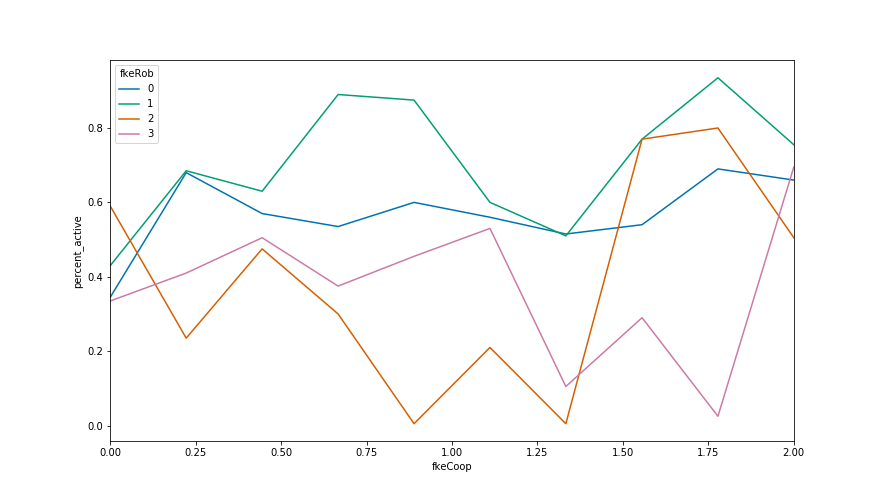

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [113]:
plt.figure()
sns.tsplot(res_df, time='fkeCoop', unit='id', value='percent_active', condition='fkeRob', err_style=None)

<IPython.core.display.Javascript object>


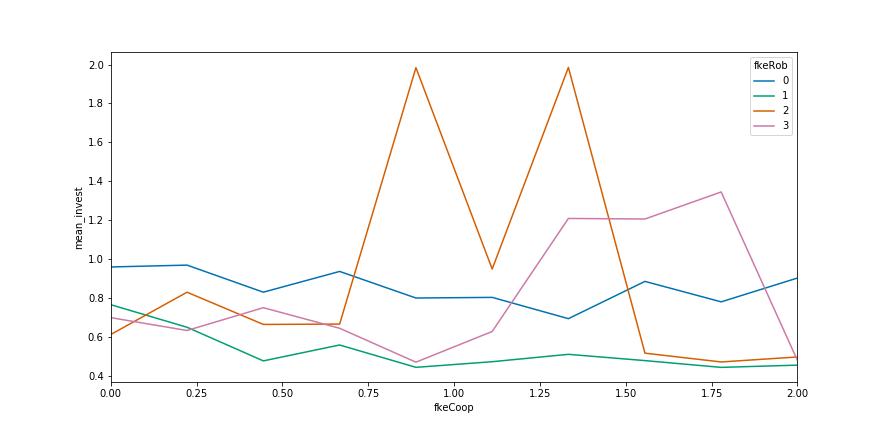

/usr/local/lib/python3.5/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


In [114]:
plt.figure()
sns.tsplot(res_df, time='fkeCoop', unit='id', value='mean_invest', condition='fkeRob', err_style=None)